# REVOLUTIONAZING CUSTOMERS CREDIT SCORE 

![istock.jpeg](https://media.istockphoto.com/id/1200726951/photo/credit-score-rating-based-on-debt-reports-showing-creditworthiness-or-risk-of-individuals-for.jpg?s=2048x2048&w=is&k=20&c=Tgx3HlK-DGFqgKD_xnzPK3i_-gSwkhYKJT-rSw7dF7A=)

## Business Problem

NicoElNino Microfinance is experiencing difficulties in accurately assessing the creditworthiness of its customers, resulting in increased loan defaults and financial losses. The company’s current methods of evaluating credit risk are manual and inefficient, undermining customer trust and business growth. To address this challenge, NicoElNino Microfinance, in collaboration with Providentia, aims to develop an intelligent credit scorecard system. 

This system will leverage the company’s extensive financial and credit-related data, along with demographic information, to automatically segregate customers into credit score brackets. By improving the accuracy of credit risk assessments, the goal is to enhance lending decisions, reduce default rates, and restore customer confidence.

### Objectives

#### Reduce Loan Defaults:
Minimize financial losses by improving the accuracy of credit risk assessments and reducing the likelihood of granting loans to high-risk customers.
#### Enhance Lending Decisions:
Empower the organization to make more informed, data-driven decisions when approving loans, ensuring fair access to credit for eligible customers.
#### Improve Operational Efficiency:
 Automate the credit evaluation process to reduce manual effort, speeding up loan processing and improving customer experience.

### Data Understanding

This dataset contains key information about customers,With 100,000 rows and 28 columns

The source of data for this project is [Kaggle](https://www.kaggle.com/).

Key Features

- ID: Unique identifier for each entry in the dataset.
  
- Customer_ID: Identifier for each customer.
  
- Month: Month of data collection.
- Name: Name of the customer.
- Age: Age of the customer.
- SSN: Social Security Number of the customer.
- Occupation: Occupation of the customer.
- Annual_Income: Annual income of the customer.
- Monthly_Inhand_Salary: Monthly salary after deductions.
- Num_Bank_Accounts: Number of bank accounts the customer has.
- Num_Credit_Card: Number of credit cards the customer has.
- Interest_Rate: Interest rate applied on loans.
- Num_of_Loan: Number of loans the customer has.
- Type_of_Loan: Type of loan taken by the customer.
- Delay_from_due_date: Number of days delayed from due date for payments.
- Num_of_Delayed_Payment: Number of delayed payments made by the customer.
- Changed_Credit_Limit: Indicates if the credit limit has been changed.
- Num_Credit_Inquiries: Number of credit inquiries made by the customer.
- Credit_Mix: Mix of different types of credit accounts held by the customer.
- Outstanding_Debt: Amount of outstanding debt.
- Credit_Utilization_Ratio: Ratio of credit used to credit available.
- Credit_History_Age: Age of credit history.
- Payment_of_Min_Amount: Indicates if minimum payment amount is met.
- Total_EMI_per_month: Total Equated Monthly Installment (EMI) paid by the customer.
- Amount_invested_monthly: Amount invested monthly by the customer.
- Payment_Behaviour: Payment behavior of the customer.
- Monthly_Balance: Monthly balance in the account.
- Credit_Score: Target variable - 

#### Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, r2_score
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Loading the data
df=pd.read_csv('train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231,Good


In [3]:
#checking data shape
df.shape

(100000, 28)

`observation`
- The dataset contains 100,000 entries, with each entry having 28 different attributes.

In [4]:
#checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
#checking for statistical summary
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633330,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


`OBSERVATION`

### Monthly_Inhand_Salary:
- Average (Mean): Around 4,194 units, which represents the typical monthly in-hand salary.
- Range: From a minimum of 303 to a maximum of 15,204, showing a wide disparity in income.
- Variability: The large standard deviation (3,183) indicates that salary figures vary significantly across the dataset, with some individuals earning very little and others earning a lot more.
### Num_Bank_Accounts:
- Average: Around 17 bank accounts, which seems unusually high, suggesting potential outliers.
- Range: Between -1 (an impossible number, indicating data error) and 1,798 accounts, another sign of data anomalies.
- Conclusion: The large variability (std = 117) and the presence of outliers require further investigation and possibly data cleaning.
### Num_Credit_Card:
- Average of 22 credit cards, which also seems abnormally high.
- Range of 0 to 1,499, again indicating extreme outliers.
- This data feature likely includes many unrealistic values and will need cleaning, especially since most people likely have far fewer than 22 credit cards.
### Interest_Rate:
- Average of 72.47%, which is high for typical loan interest rates, indicating potential issues with the data or inclusion of non-standard loans.
- Range of From 1% to 5,797%, where the maximum is unrealistic, suggesting outliers or data errors.
- The high variability (std = 466) implies the need to investigate extreme values and potential data inaccuracies.
### Delay_from_due_date:
- Average of21 days, indicating that, on average, customers pay their bills about 3 weeks late.
- Range from -5 days (early payments) to 67 days late.
- This feature seems reasonable, although the presence of negative values should be examined.
### Num_Credit_Inquiries:
- Average of 27.75 credit inquiries, which seems high.
- Range from 0 to 2,597, with extreme outliers skewing the data.
- The majority of individuals likely have far fewer inquiries, as indicated by the median (6), but there are significant outliers.
### Credit_Utilization_Ratio:
- Average of 32.29%, meaning most people use around a third of their available credit, which is considered healthy.
- Range from 20% to 50%, with minimal outliers.
- This feature appears well-behaved with little variability and no major outliers.
### Total_EMI_per_month:
- Average of 1,403 units, indicating a relatively high average monthly loan repayment.
- Range from 0 to 82,331, with extreme outliers at the high end, inflating the average.
- There are significant outliers, and most customers likely pay much smaller monthly EMIs (as seen by the 50th percentile = 69.25 units).


## DATA PREPROCESSING

### Data Preparation

### Consistency

In [6]:
# checking for duplicates
print(f'The data has {df.duplicated().sum()} duplicates')

The data has 0 duplicates


### Completeness
To achieve completeness in our data, I will be checking for missing values in the data.

In [7]:
# Check for null values
print(f'The data has {df.isna().sum().sum()} missing values')

The data has 60071 missing values


In [8]:
# Define a function to explore missing data
def missing_data(df):
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data.to_frame()

In [9]:
missing_data(df)

,0
Name,9985
Monthly_Inhand_Salary,15002
Type_of_Loan,11408
Num_of_Delayed_Payment,7002
Num_Credit_Inquiries,1965
Credit_History_Age,9030
Amount_invested_monthly,4479
Monthly_Balance,1200


`Observation`
- The columns have a number of missing values.handling missing data can improve model accuracy and ensure all records are usable in analysis.

In [10]:
# Fill missing values for numerical columns with mean
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean())

In [11]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean())

In [12]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'],errors='coerce')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean())

In [13]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'],errors='coerce')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean())

In [14]:
#Removing rows that have null values
df=df.dropna(subset=['Name','Type_of_Loan','Credit_History_Age'])

In [15]:
# counting values in Payment_of_Min_Amount
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    40519
No     23258
NM      8727
Name: count, dtype: int64

In [16]:
#removing unwanted values in `Payment_of_Min_Amount` column
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x : 'No' if x == 'NM' else x)

In [17]:
# counting values in `Credit_Mix`
df["Credit_Mix"].value_counts()

Credit_Mix
Standard    26536
Good        15865
Bad         15573
_           14530
Name: count, dtype: int64

In [18]:
#replacing underscores  "Unknown"
df["Credit_Mix"] = df["Credit_Mix"].str.replace("_" , "Unknown")

In [19]:
df["Credit_Mix"].value_counts()

Credit_Mix
Standard    26536
Good        15865
Bad         15573
Unknown     14530
Name: count, dtype: int64

In [20]:
df["Occupation"].value_counts()

Occupation
_______          5102
Lawyer           4797
Mechanic         4694
Architect        4591
Scientist        4568
Engineer         4567
Entrepreneur     4545
Teacher          4544
Doctor           4537
Accountant       4519
Developer        4484
Media_Manager    4469
Writer           4288
Journalist       4284
Manager          4260
Musician         4255
Name: count, dtype: int64

In [21]:
#replacing the underscore with other
df["Occupation"] = df["Occupation"].str.replace("_______" , "Other")

In [22]:
#removing the rows with the invalid values
df = df[df["Payment_Behaviour"] != "!@9#%8"]

### Uniformity

In [23]:
# checking for dat types
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [24]:
# Convert 'Age' and 'Num_of_Loan' to int
df["Age"] = df["Age"].str.replace("-" , "").str.replace("_" , "").astype("int")
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_" , "").str.replace("-" , "").astype("int")

In [25]:
# Converting the column to float
df["Annual_Income"] = df["Annual_Income"].str.replace("_" , "").astype("float")
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace("_" , "").astype("float")

In [26]:
# Check for remaining errors
print(df[['Annual_Income', 'Outstanding_Debt']].dtypes)

Annual_Income       float64
Outstanding_Debt    float64
dtype: object


In [27]:
#droping rows where Age value is greater than 100
df.drop(df[df["Age"] > 100].index , inplace=True)

### Exploratory data analysis

#### Checking for outstanding debt distribution per month

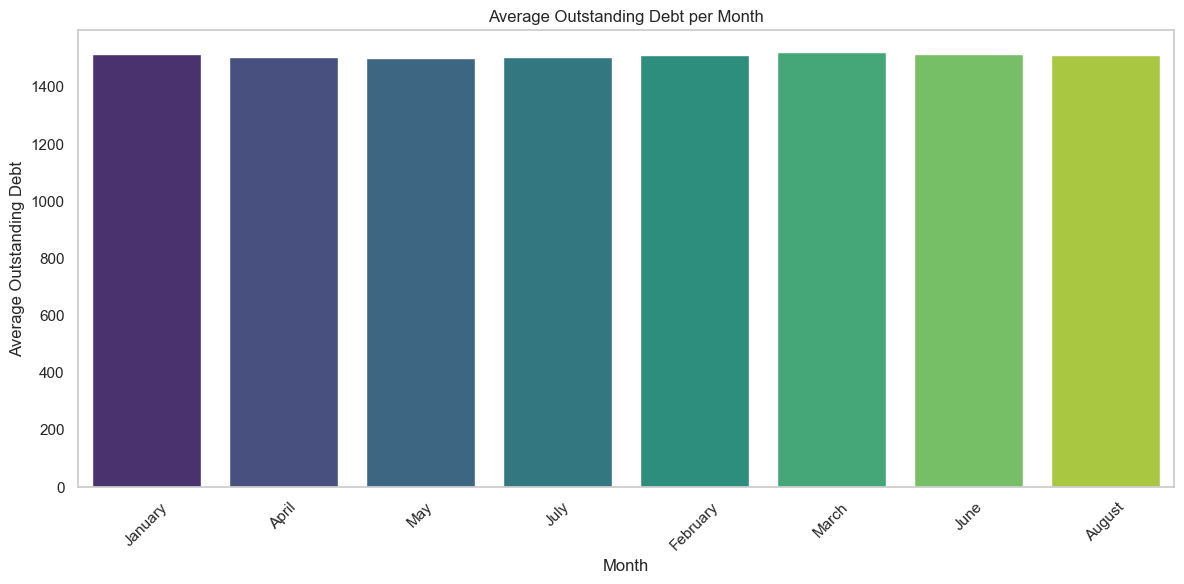

In [28]:
# Set the style for the plot
sns.set(style='whitegrid')

# Creating a bar plot for the average outstanding debt per month
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Outstanding_Debt', estimator=np.mean, ci=None, palette='viridis')

# Adding title and labels
plt.title('Average Outstanding Debt per Month')
plt.xlabel('Month')
plt.ylabel('Average Outstanding Debt')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Tight layout to prevent overlapping
plt.tight_layout()

# Remove grid lines
plt.grid(False)

# Show the plot
plt.show()


`Observation`
- The heights of the bars are quite similar across all months, indicating that the average outstanding debt remained fairly consistent from January to August. There’s no significant spike or drop, which suggests a stable debt level month-to-month.
- This might suggest that there were no major financial changes or shifts in payment behaviors among customers.

### Distribution of payment Behaviors

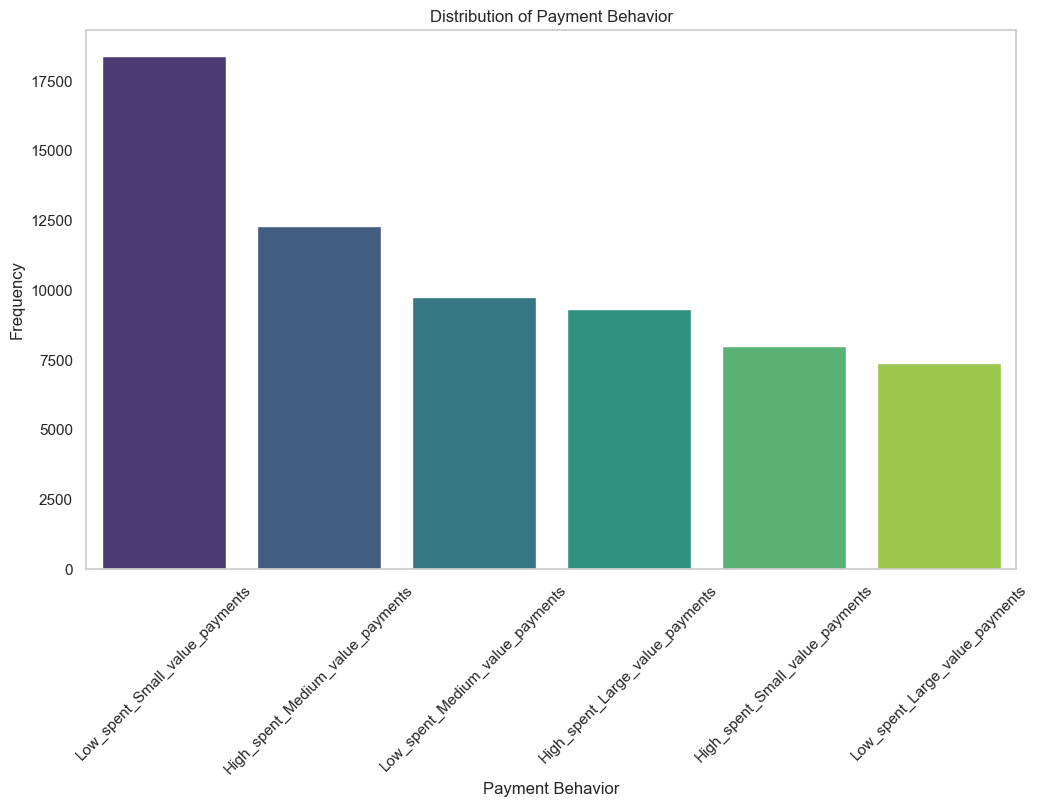

In [29]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Count the occurrences of each payment behavior
payment_behavior_counts = df['Payment_Behaviour'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=payment_behavior_counts.index, y=payment_behavior_counts.values, palette="viridis")
plt.title("Distribution of Payment Behavior")
plt.xlabel("Payment Behavior")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

# Remove grid lines
plt.grid(False)

plt.show()

`Observation`

- The "Low_spent_Small_value_payments" category has the highest frequency, with over 17,500 occurrences. This suggests that a significant portion of customers tend to make small payments while maintaining low spending. This could indicate conservative financial behavior or a tendency to minimize expenses.


- "High_spent_Medium_value_payments," has a frequency somewhat lower than the highest category. This implies that there is also a sizable group of customers who make medium-sized payments while maintaining relatively high spending habits. This behavior might be typical of individuals who manage larger expenses but still make regular payments.
Lower Frequency of High-Spent, Large-Value Payments:

- "High_spent_Large_value_payments" and "Low_spent_Large_value_payments" have relatively lower frequencies. These categories likely represent customers who either make large payments occasionally or manage finances in a less conventional way. These behaviors may be linked to higher income individuals or specific lifestyle choices.

- The spread across the different types indicates diverse payment behavior in the customer base. Such variation can be valuable in analyzing creditworthiness or predicting financial risk, as different payment behaviors may correlate with varying levels of credit risk.

- This distribution could inform strategies for personalized financial products. For example, targeting customers with "Low_spent_Small_value_payments" might require different strategies than those for "High_spent_Large_value_payments."

#### Average outstanding debt by occupation

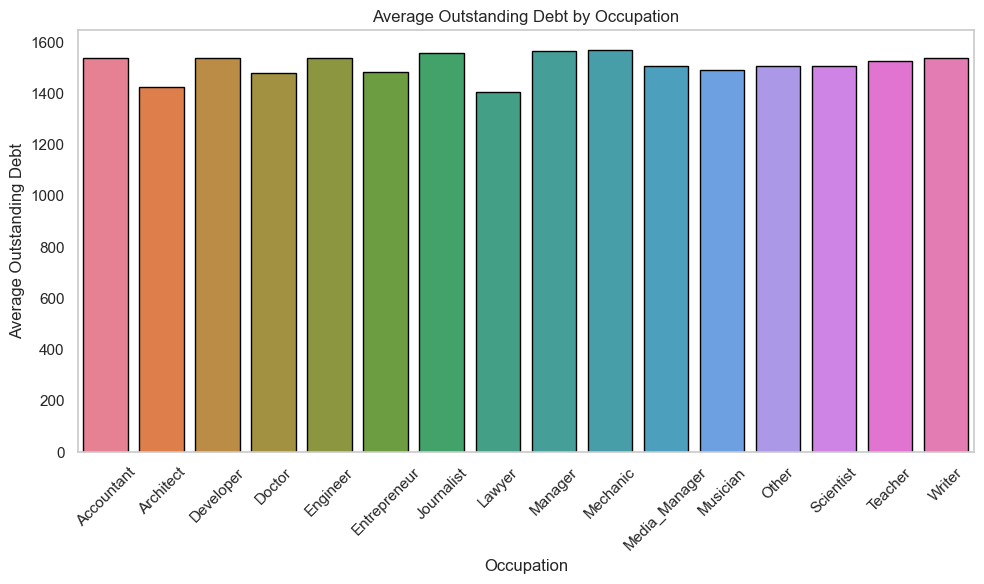

In [30]:
# Group by Occupation and calculate the average Outstanding Debt
average_debt = df.groupby('Occupation')['Outstanding_Debt'].mean().reset_index()

# Set a color palette with different colors for each occupation
palette = sns.color_palette('husl', len(average_debt))

# Plot the bar chart with different colors for each occupation
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Outstanding_Debt', data=average_debt, palette=palette, edgecolor='black')

# Adding title and labels
plt.title('Average Outstanding Debt by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Outstanding Debt')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show grid on the y-axis
plt.grid(axis='y', alpha=0.75)

# Remove grid lines
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


`Key Observations`
- Occupations such as Manager and Mechanic show relatively high average outstanding debt, with values approaching 1600. This could suggest that individuals in these professions tend to have higher loan obligations or other outstanding debts.
Moderate Debt Levels:

- Most other professions, including Doctor, Engineer, Developer, and Teacher, have similar average debt levels around 1400–1500. This indicates that many occupations have comparable debt obligations, with minor differences.
Low Variability Across Occupations:

- Overall, there isn't a drastic variation in average outstanding debt across the occupations. Most occupations fall within a close range of each other, suggesting that debt levels are generally consistent regardless of occupation.

##### DISTRIBUTION OF CREDIT SCORE

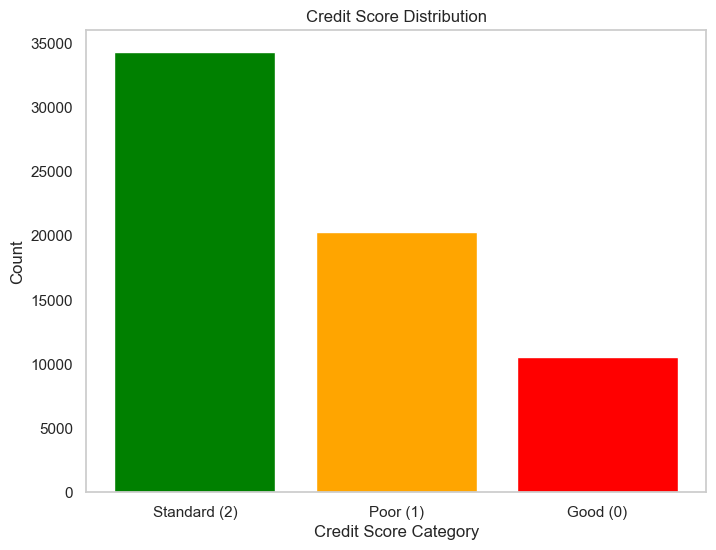

In [31]:
# Data for the credit scores
credit_score_counts = [34319 ,20306, 10552]

categories = ['Standard (2)', 'Poor (1)', 'Good (0)']

# Create the bar plot
plt.figure(figsize=(8,6))
plt.bar(categories, credit_score_counts, color=['green', 'orange', 'red'])

# Add titles and labels
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')

plt.grid(False)

# Display the plot
plt.show()

`Key Insights`
- The majority of individuals have a "Standard" credit score, suggesting that the customer base is predominantly lower-risk.
- The smaller group in the "Poor" category indicates fewer individuals with significant credit risks.
- This distribution provides valuable insights for targeting financial products or interventions based on risk level, with a focus on the "Good" and "Poor" categories to potentially improve their creditworthiness.

### Feature Engineering
- Feature engineering transforms raw data into information-rich features that better capture the underlying patterns in the data by improving model accuracy

In [32]:
# Function to convert 'Credit_History_Age' to total months
def convert_credit_history_age(age_str):
    # Split the string into parts
    parts = age_str.split()
    
    # Extract years and months
    years = int(parts[0])
    months = int(parts[3])
    
    # Convert to total months
    total_months = (years * 12) + months
    return total_months

# Applying the function to the column
df['Credit_History_Age_in_Months'] = df['Credit_History_Age'].apply(convert_credit_history_age)

In [33]:
#droping Columns
df.drop(['ID','Customer_ID','Name','SSN','Credit_History_Age','Type_of_Loan','Month','Num_Bank_Accounts','Num_Credit_Card','Changed_Credit_Limit'], axis=1, inplace=True)

In [34]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_in_Months
0,23,Scientist,19114.12,1824.843333,3,4,3,7.000000,4.0,Unknown,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265
3,23,Scientist,19114.12,4194.170850,3,4,5,4.000000,4.0,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268
4,23,Scientist,19114.12,1824.843333,3,4,6,31.033051,4.0,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269
6,23,Scientist,19114.12,1824.843333,3,4,3,31.033051,4.0,Good,809.98,22.537593,No,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good,271
8,28,Other,34847.84,3037.986667,6,1,3,4.000000,2.0,Good,605.03,24.464031,No,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard,319


In [35]:
df.to_csv('credit_data.csv', index=False)

In [36]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    34319
Poor        20306
Good        10552
Name: count, dtype: int64

In [37]:
df['Occupation'].value_counts()

Occupation
Other            4600
Lawyer           4324
Mechanic         4191
Architect        4130
Entrepreneur     4126
Teacher          4116
Scientist        4093
Engineer         4086
Accountant       4079
Doctor           4063
Media_Manager    4014
Developer        3975
Musician         3848
Journalist       3845
Writer           3845
Manager          3842
Name: count, dtype: int64

In [38]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      18401
High_spent_Medium_value_payments    12301
Low_spent_Medium_value_payments      9744
High_spent_Large_value_payments      9337
High_spent_Small_value_payments      8015
Low_spent_Large_value_payments       7379
Name: count, dtype: int64

### Encoding categorical variables
- Converting categorical (non-numeric) data into a numerical format, as most machine learning models can only interpret numbers.

 - `Occupation`, `Credit_Mix`,`Payment_Behaviour` and `credit_Score` needs to be transformed into a format that the model can process. Encoding ensures that these variables contribute to the model's learning.

In [39]:
# Initialize the label encoder
label_encoder = LabelEncoder()

In [40]:
# Applying label encoding to 'Payment_of_Min_Amount'
df['Payment_of_Min_Amount'] = label_encoder.fit_transform(df['Payment_of_Min_Amount'])

In [41]:
# Applying Label Encoder to the 'Payment_Behaviour' column
df['Payment_Behaviour'] = label_encoder.fit_transform(df['Payment_Behaviour'])

In [42]:
# applyinglabel encoder to `Credit_Mix`
df["Credit_Mix"]=label_encoder.fit_transform(df["Credit_Mix"])

In [43]:
#applying label encoder in `Occupation`
df['Occupation']=label_encoder.fit_transform(df['Occupation'])

In [44]:
# applyin label encoder to target varable
df['Credit_Score']=label_encoder.fit_transform(df['Credit_Score'])

#### SMOTE

Using SMOTE to handle class imbalance in the Credit_Score variable.

SMOTE enables the model to learn patterns in all classes more effectively, potentially leading to better performance, especially for the underrepresented classes.

In [45]:
#Selecting y and X variables
X = df.drop(columns=["Credit_Score"])  # Drop the target variable
y = df["Credit_Score"]

#Applying SMOTE to balance the classes in the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [46]:
df["Credit_Score"].value_counts()

Credit_Score
2    34319
1    20306
0    10552
Name: count, dtype: int64

In [47]:
#df.head()

In [48]:
#df.to_csv('credit_data.csv', index=False)

### MODELLING

#### Splitting Data into Train and Test Sets

In [49]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_resampled,  y_resampled , test_size=0.2, random_state=42)


#### Standardization of the data

Standardization transforms the data to have a mean of 0 and a standard deviation of 1.This prevents features with larger numerical values from dominating the learning process and ensures that each feature contributes equally to the model.

In [50]:
# Define the columns based on their types
numeric_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 
                   'Interest_Rate', 
                  'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt',
                  'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 
                  'Monthly_Balance', 'Credit_History_Age_in_Months']

categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_processed = preprocessor.transform(X_test)

# Get the feature names after transformation
numeric_feature_names = numeric_cols
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = numeric_feature_names + list(categorical_feature_names)

# Create DataFrames for preprocessed data
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

### Build the model

##### Logistic Regression

In [51]:
#Initialize logistic regression model
baseline_model = LogisticRegression(random_state=42)
# Train the model
baseline_model.fit(X_train_processed, y_train)

# Predict on the testing data
y_pred = baseline_model.predict(X_test_processed)

In [52]:
#Evaluating the model
print("Baseline Model Performance:")
print(classification_report(y_test, y_pred))
print("Baseline Model Accuracy is: " + str(accuracy_score(y_test, y_pred)))
print("Baseline Model r-squared is: " + str(r2_score(y_test, y_pred)))

Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76      6777
           1       0.70      0.62      0.66      6987
           2       0.59      0.53      0.56      6828

    accuracy                           0.66     20592
   macro avg       0.66      0.66      0.66     20592
weighted avg       0.66      0.66      0.66     20592

Baseline Model Accuracy is: 0.664044289044289
Baseline Model r-squared is: -0.040362470372688586


`Observation`
- The baseline model has moderate performance, with an overall accuracy of 66%, but it struggles more with class 1 (the recall for class 1 is only 44%, meaning many class 1 instances are misclassified). Class 2 is performing the best, with a recall of 71%.
- The R-squared score suggests the model is not a strong predictor, likely due to its poor fit with the data or possibly class imbalances. It is important to optimize this baseline model further to improve the overall performance.

#### Random Forest

In [53]:
# Initialize the model
model = RandomForestClassifier(random_state=42)
# Train the model
model.fit(X_train_processed, y_train)

# Predict on the testing data
y_pred = model.predict(X_test_processed)

In [54]:
#Evaluating the model
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred))
print("Random Forest Model Accuracy is: " + str(accuracy_score(y_test, y_pred)))
print("Random Forest Model r-squared is: " + str(r2_score(y_test, y_pred)))

Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6777
           1       0.82      0.85      0.83      6987
           2       0.81      0.67      0.73      6828

    accuracy                           0.81     20592
   macro avg       0.81      0.81      0.81     20592
weighted avg       0.81      0.81      0.81     20592

Random Forest Model Accuracy is: 0.8108003108003108
Random Forest Model r-squared is: 0.3727247900126802


`Observation`
- The Random Forest model performs well, achieving an overall accuracy of 81% and an F1-score of 0.81 across all classes.
- The model is very strong at identifying "Good" (class 0) and "Fair" (class 1) credit scores, with high recall and precision for these classes.

#### XGBoost

In [55]:
# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42)
# Train the model
xgb.fit(X_train_processed, y_train)

# Predict on the testing data
y_pred = xgb.predict(X_test_processed)

In [56]:
#Evaluating the model
print("XGBoost Model Performance:")
print(classification_report(y_test, y_pred))
print("XGBoost Model Accuracy is: " + str(accuracy_score(y_test, y_pred)))
print("XGBoost Model r-squared is: " + str(r2_score(y_test, y_pred)))

XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      6777
           1       0.81      0.81      0.81      6987
           2       0.77      0.67      0.72      6828

    accuracy                           0.79     20592
   macro avg       0.79      0.79      0.79     20592
weighted avg       0.79      0.79      0.79     20592

XGBoost Model Accuracy is: 0.7944832944832945
XGBoost Model r-squared is: 0.3409714632357267


`Observation`
- The XGBoost model outperforms the baseline model, with an overall accuracy of 79% and an F1-score of 0.79 across all classes.
Strengths: The model performs very well for "Good" and "Fair" credit scores, achieving high precision and recall.
Weakness: The model struggles slightly with identifying "Poor" credit scores (class 2), as seen in the lower recall and F1-score for that class.

### Hyperparameter tunning

In [57]:


# Define the reduced parameter grid to search
param_grid = {
    'n_estimators': [50, 100],  # Reduced number of trees in the forest
    'max_depth': [None, 10, 20],  # Reduced maximum depth of the trees
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Reduced number of features to consider when looking for the best split
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, 
                                   param_distributions=param_grid, 
                                   n_iter=10,  # Limit to 10 random combinations
                                   cv=3,  # Reduced CV folds
                                   n_jobs=-1, 
                                   verbose=2, 
                                   random_state=42)

# Perform randomized search
random_search.fit(X_train_processed, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model
train_accuracy_best = best_rf_model.score(X_train_processed, y_train)
test_accuracy_best = best_rf_model.score(X_test_processed, y_test)

print("Random Forest - Train Accuracy (Best Model):", train_accuracy_best)
print("Random Forest - Test Accuracy (Best Model):", test_accuracy_best)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Random Forest - Train Accuracy (Best Model): 0.9728039822740242
Random Forest - Test Accuracy (Best Model): 0.7962315462315462


`Observation`
- The training accuracy for the best model is 0.9728, or 97.28%. This indicates that the model performs exceptionally well on the training dataset, correctly predicting approximately 97.28% of the instances.
- The test accuracy for the best model is 0.7962, or 79.62%. This indicates that it correctly predicts approximately 79.62% of the instances.

#### Feature importance
It provides insights into which features have the most impact on the model's predictions.

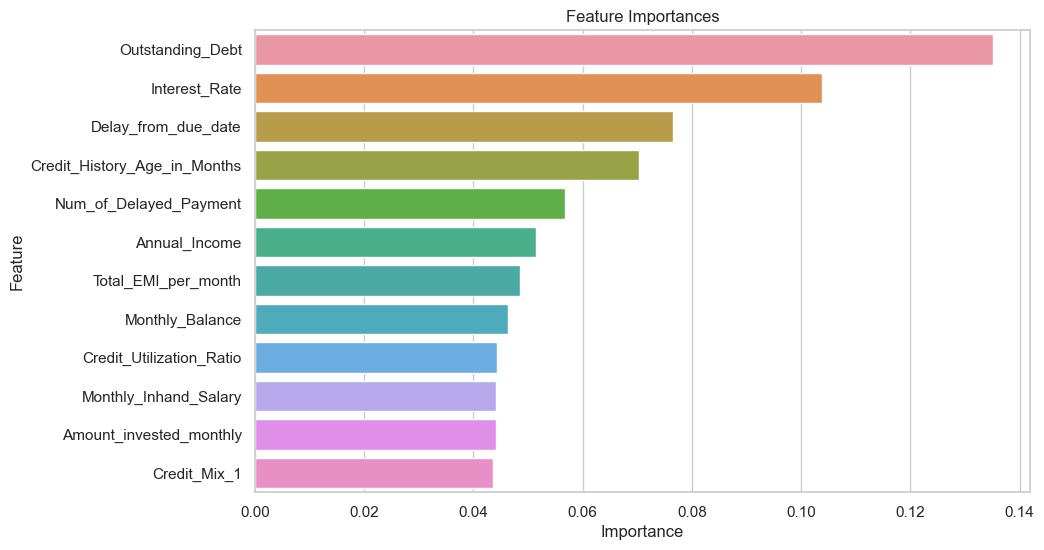

In [58]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train_processed, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(12)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show();

### Model selection

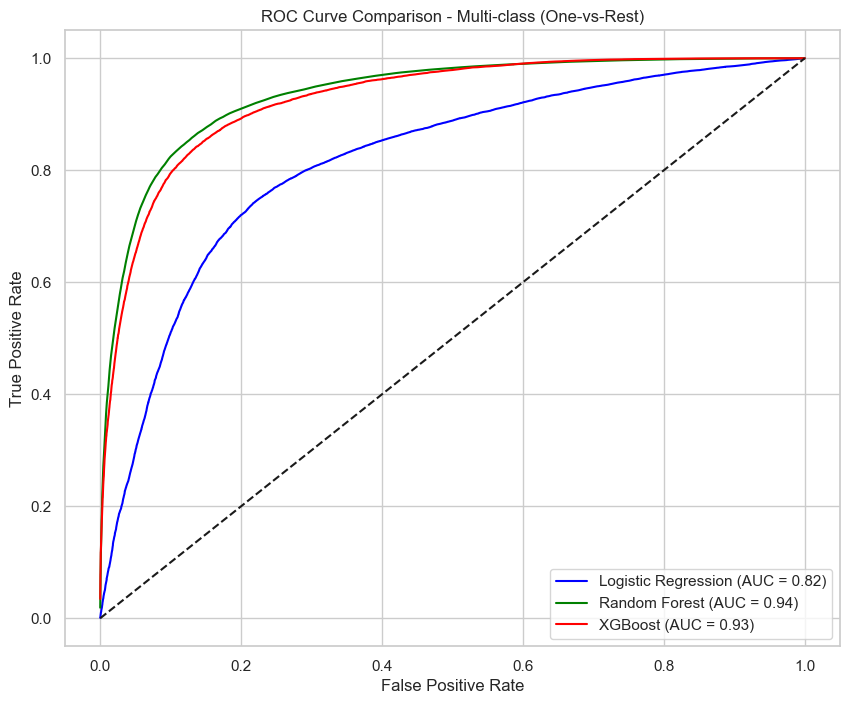

In [59]:
 #Binarize the target labels for ROC curve calculation (assuming y_test has classes 0, 1, 2)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Initialize models
baseline_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Train models
baseline_model.fit(X_train_processed, y_train)
rf_model.fit(X_train_processed, y_train)
xgb_model.fit(X_train_processed, y_train)

# Get predicted probabilities for each model
y_prob_lr = baseline_model.predict_proba(X_test_processed)
y_prob_rf = rf_model.predict_proba(X_test_processed)
y_prob_xgb = xgb_model.predict_proba(X_test_processed)

# Initialize dictionaries to store false positive rate, true positive rate, and AUC values
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class and each model
models = {'Logistic Regression': y_prob_lr, 'Random Forest': y_prob_rf, 'XGBoost': y_prob_xgb}
colors = {'Logistic Regression': 'blue', 'Random Forest': 'green', 'XGBoost': 'red'}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for model_name, y_prob in models.items():
    fpr[model_name] = dict()
    tpr[model_name] = dict()
    roc_auc[model_name] = dict()
    
    for i in range(n_classes):
        fpr[model_name][i], tpr[model_name][i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[model_name][i] = auc(fpr[model_name][i], tpr[model_name][i])
    
    # Compute micro-average ROC curve and AUC for each model
    all_fpr = np.unique(np.concatenate([fpr[model_name][i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[model_name][i], tpr[model_name][i])
    mean_tpr /= n_classes
    roc_auc[model_name]["micro"] = auc(all_fpr, mean_tpr)
    
    # Plot micro-average ROC curve
    plt.plot(all_fpr, mean_tpr, color=colors[model_name],
             label=f'{model_name} (AUC = {roc_auc[model_name]["micro"]:.2f})')

# Plot a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Multi-class (One-vs-Rest)")
plt.legend(loc="lower right")
plt.show()

`Observtion`
- Random Forest: Tends to perform well in complex datasets due to its ensemble structure. It may achieve a higher AUC if the dataset contains non-linear relationships.
- Logistic Regression have a lower AUC of 82% than other models.
- XGBoost is the second most performing model with an AUC of 93%

## Findings

- The most frequent payment behavior is "Low_spent_Small_value_payments," suggesting that a large proportion of customers prefer conservative spending with smaller payments. This may indicate a cautious or budget-conscious segment of the customer base. These individuals might prioritize staying within a fixed budget, making them potentially lower-risk in terms of credit management.
- Majority of customers have a "Good" credit score, suggesting that the customer base is predominantly lower-risk.
- Average outstanding debt remained fairly consistent throughout the months showing no significant spike or drop, which suggests a stable debt level 

### RECOMMENDATIONS

- Monthly Balance Management: Customers with low or fluctuating monthly balances might benefit from budgeting tools or advice on maintaining a stable balance to reduce financial stress and improve payment regularity.
- Financial Literacy Initiatives: For customers with lower scores, personalized advice on managing loans, balancing credit inquiries, and avoiding high-interest debts can empower them to make better financial decisions.
- Monitoring and Feedback by offering a credit score tracker that shows changes in specific behaviors (e.g., lowering Credit_Utilization_Ratio, timely payments) could positively impact their score. Visualizing the potential impact could motivate users to improve credit habits.

### CONCLUSION

- Many customers have potential for score improvement through financial discipline. With better payment patterns, optimized credit utilization, and debt reduction, even customers with moderate credit scores could improve over time.
- The dataset highlights key areas for financial institutions to focus on when evaluating creditworthiness, particularly behavioral and utilization metrics. By emphasizing these factors, financial institutions can better assess risk and offer tailored recommendations or products to encourage positive financial habits among customers.
- The Credit_Utilization_Ratio and Outstanding_Debt features suggest that higher utilization ratios and debts negatively impact credit scores. Keeping credit utilization under control and reducing debt load are essential steps for maintaining or improving credit scores.